# Tutorial 3: Integrating DLPFC dataset 

In this tutorial, we illustrate the application of spatiAlign for integrating a series of 10x Genomics Visium datasets from the human dorsolateral prefrontal cortex (DLPFC).

- ### Import packages

In [1]:
import scanpy as sc
from spatialign import Spatialign
from warnings import filterwarnings
from anndata import AnnData

filterwarnings("ignore")

In [2]:
datasets = [
    "/media/Data/zhangchao/final_spatialign_version/dataset/DLPFC/DLPFC_151673.h5ad",
    "/media/Data/zhangchao/final_spatialign_version/dataset/DLPFC/DLPFC_151674.h5ad",
    "/media/Data/zhangchao/final_spatialign_version/dataset/DLPFC/DLPFC_151675.h5ad",
    "/media/Data/zhangchao/final_spatialign_version/dataset/DLPFC/DLPFC_151676.h5ad",
]

- ### Initialize        
Read datasets and load `spatiAlign` model

In [3]:
model = Spatialign(
    *datasets,
    batch_key='batch',
    is_norm_log=True,
    is_scale=False,
    n_neigh=15,
    is_undirected=True,
    latent_dims=100,
    seed=42,
    gpu=0,
    save_path="./",
    is_verbose=False
)

2024-02-04 18:14:24 Found Dataset: 
  cell nums: 3611 gene nums: 15112
  cell nums: 3635 gene nums: 15871
  cell nums: 3566 gene nums: 14626
  cell nums: 3431 gene nums: 14678
2024-02-04 18:14:28: Spatial coordinates are used to calculate nearest neighbor graphs
2024-02-04 18:14:35 Method: 'init_bank' Running...
  Running time: 0.0 min 1.6714 s


- ### Training `spatiAlign` model               
`spatiAlign` aims to aligns the biological effects, while maximized preserving spots/cells biological variances in the latent embedding.             
It is possible to fine-tune the parameters (tau1, tau2, tau3) to optimize the model’s performance.

In [4]:
model.train(tau1=0.05, tau2=1, tau3=0.1)

2024-02-04 18:14:36 Method: 'train' Running...
  2024-02-04 18:16:35 Epoch: 167 Loss: 60.2606 Loss min: 60.2352 EarlyStopping counter: 15 out of 15
  2024-02-04 18:16:35 Model Training Finished!
  2024-02-04 18:16:35 Trained checkpoint file has been saved to ./ckpt
  Running time: 1.0 min 58.5259 s


- ### Inference alignment datasets          
After model training, the learned lower-dimensional representations will be saved in `adata.obsm[‘correct’]`, and the higher-dimensional representations will be saved in `adata.X`.

In [5]:
model.alignment()

2024-02-04 18:16:35 Method: 'alignment' Running...
2024-02-04 18:16:49 Batch Alignment Finished!
2024-02-04 18:16:49 Alignment data saved in: ./res
  Running time: 0.0 min 13.9820 s


- ### Visualizing inference datasets

In [6]:
correct1 = sc.read_h5ad("./res/correct_data0.h5ad")
correct2 = sc.read_h5ad("./res/correct_data1.h5ad")
correct3 = sc.read_h5ad("./res/correct_data2.h5ad")
correct4 = sc.read_h5ad("./res/correct_data3.h5ad")

In [7]:
merge_data = correct1.concatenate(correct2, correct3, correct4)

In [8]:
sc.pp.neighbors(merge_data, use_rep="correct", random_state=42)
sc.tl.umap(merge_data, random_state=42)

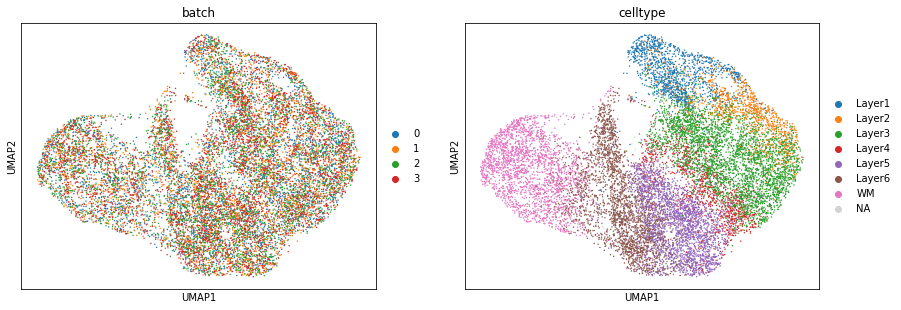

In [9]:
sc.pl.umap(merge_data, color=["batch", "celltype"])